In [ ]:
from google.colab import files
import pandas as pd


# Upload CSV
uploaded = files.upload()


# Load into pandas (replace file name with your uploaded CSV name)
df = pd.read_csv('india_water_well_dataset.csv')
df.head()

Saving india_water_well_dataset.csv to india_water_well_dataset (1).csv


,latitude,longitude,elevation_m,slope_deg,avg_rainfall_mm,rainy_days,distance_to_river_km,depth_to_bedrock_m,ndvi_mean,ndvi_dry,ndvi_wet,soil_type,landcover,drilling_method,well_depth_m,screen_length_m,diameter_in,success,yield_lpm
0,18.112583,75.589465,618,2.742856,1232.160207,57,6.987688,40.568336,0.157647,0.106770,0.297948,sandy,urban,manual,91.991793,10.254565,8,0,0.000000
1,33.669286,75.162385,1704,3.028930,978.296118,49,5.423915,13.718252,0.485207,0.435034,0.543565,sandy,cropland,down_the_hole,94.028044,9.357486,8,1,102.279520
2,27.763836,94.281383,1238,3.747465,748.374153,131,2.496714,16.778879,0.289888,0.230121,0.422151,black,cropland,rotary,168.326143,13.135591,6,0,0.000000
3,24.163779,75.236840,1038,4.409541,1013.976049,50,10.210829,28.066592,0.530454,0.470298,0.595650,sandy,forest,manual,126.327989,9.531632,12,1,62.250999
4,12.212503,75.886542,1649,3.023994,785.227422,136,1.783826,19.877036,0.784031,0.663542,0.837845,sandy,cropland,rotary,153.783293,7.653875,8,1,163.479165


In [ ]:
# Show dataset info
df.info()


# Show basic statistics
df.describe()


# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   latitude              2000 non-null   float64
 1   longitude             2000 non-null   float64
 2   elevation_m           2000 non-null   int64  
 3   slope_deg             2000 non-null   float64
 4   avg_rainfall_mm       2000 non-null   float64
 5   rainy_days            2000 non-null   int64  
 6   distance_to_river_km  2000 non-null   float64
 7   depth_to_bedrock_m    2000 non-null   float64
 8   ndvi_mean             2000 non-null   float64
 9   ndvi_dry              2000 non-null   float64
 10  ndvi_wet              2000 non-null   float64
 11  soil_type             2000 non-null   object 
 12  landcover             2000 non-null   object 
 13  drilling_method       2000 non-null   object 
 14  well_depth_m          2000 non-null   float64
 15  screen_length_m      

,0
latitude,0
longitude,0
elevation_m,0
slope_deg,0
avg_rainfall_mm,0
rainy_days,0
distance_to_river_km,0
depth_to_bedrock_m,0
ndvi_mean,0
ndvi_dry,0


In [ ]:
!pip install seaborn plotly --quiet


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


# ✅ Safe style to avoid errors
plt.style.use('seaborn-v0_8-deep')

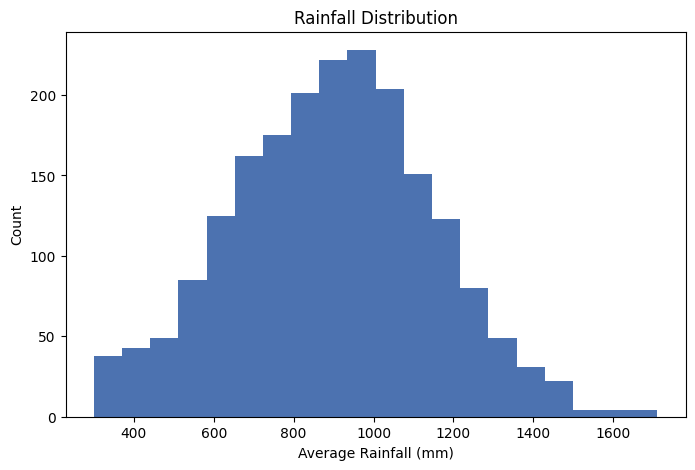

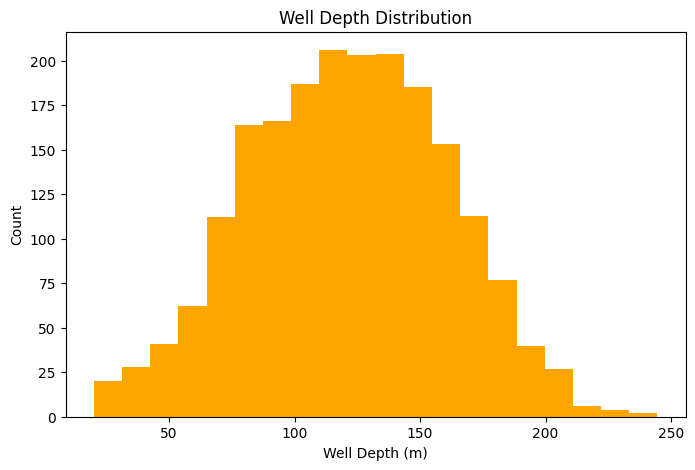

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['avg_rainfall_mm'], bins=20)
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Count')
plt.title('Rainfall Distribution')
plt.show()


plt.figure(figsize=(8,5))
plt.hist(df['well_depth_m'], bins=20, color='orange')
plt.xlabel('Well Depth (m)')
plt.ylabel('Count')
plt.title('Well Depth Distribution')
plt.show()

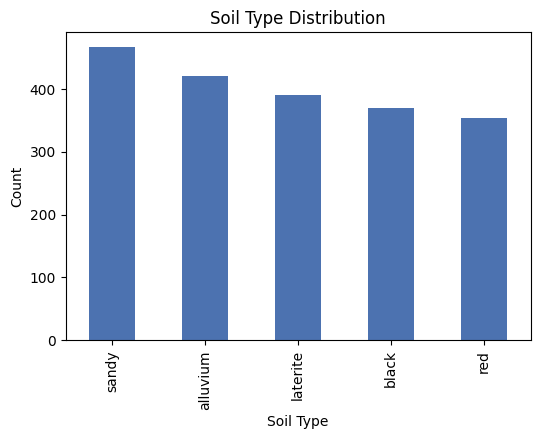

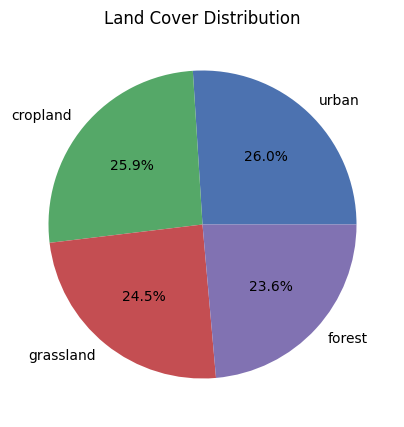

In [ ]:
# Bar chart of soil types
soil_counts = df['soil_type'].value_counts()
soil_counts.plot(kind='bar', figsize=(6,4))
plt.title('Soil Type Distribution')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.show()


# Pie chart of land cover
landcover_counts = df['landcover'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(landcover_counts, labels=landcover_counts.index, autopct='%1.1f%%')
plt.title('Land Cover Distribution')
plt.show()

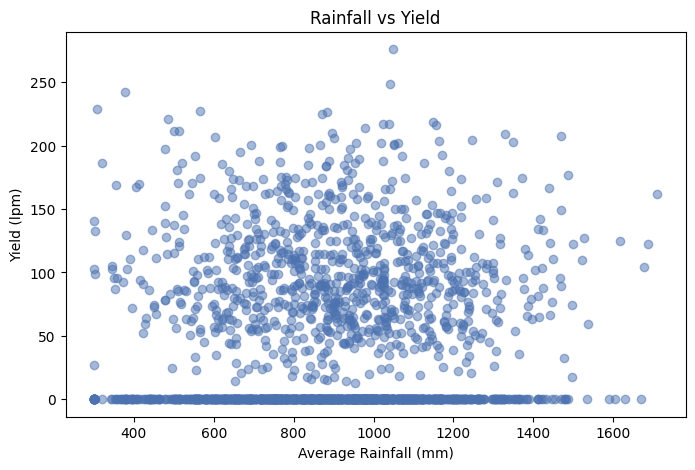

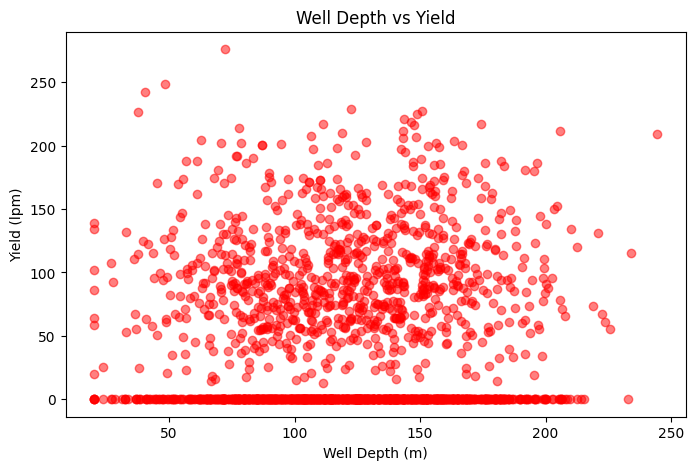

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['avg_rainfall_mm'], df['yield_lpm'], alpha=0.5)
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Yield (lpm)')
plt.title('Rainfall vs Yield')
plt.show()


plt.figure(figsize=(8,5))
plt.scatter(df['well_depth_m'], df['yield_lpm'], alpha=0.5, color='red')
plt.xlabel('Well Depth (m)')
plt.ylabel('Yield (lpm)')
plt.title('Well Depth vs Yield')
plt.show()

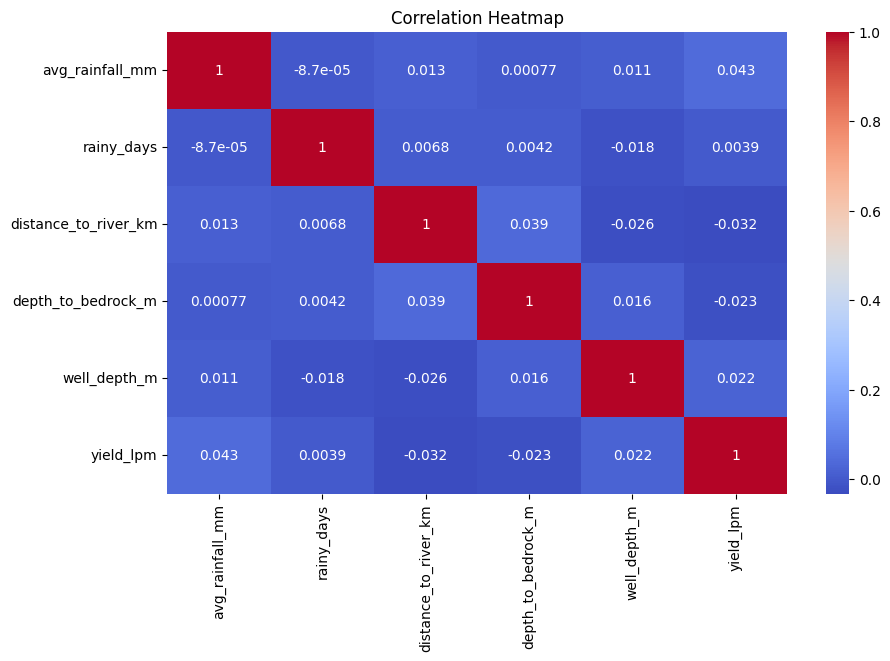

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['avg_rainfall_mm','rainy_days','distance_to_river_km','depth_to_bedrock_m','well_depth_m','yield_lpm']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

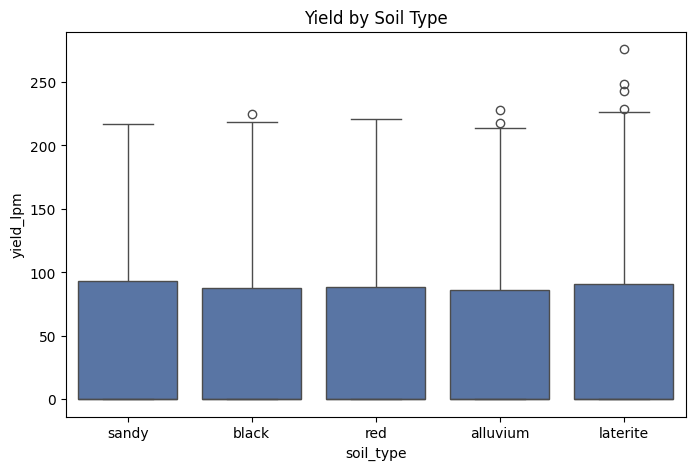

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='soil_type', y='yield_lpm', data=df)
plt.title('Yield by Soil Type')
plt.show()

In [ ]:
fig = px.scatter(df, x='avg_rainfall_mm', y='yield_lpm', color='soil_type', title='Interactive Rainfall vs Yield')
fig.show()


fig = px.histogram(df, x='well_depth_m', nbins=30, title='Interactive Well Depth Histogram')
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Select features
X = df[['avg_rainfall_mm','distance_to_river_km','depth_to_bedrock_m','ndvi_mean','well_depth_m']]
y = df['success']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)


# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.66      0.59       206
           1       0.53      0.42      0.47       194

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.53       400
weighted avg       0.54      0.54      0.53       400

